# Project 1: California Housing Prices

## EXPLORATORY DATA ANALYSIS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv('housing.csv')

In [3]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
dataset.head(100)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
95,-122.26,37.80,36,5329,2477.0,3469,2323,2.0096,NEAR BAY,130000
96,-122.26,37.82,31,4596,1331.0,2048,1180,2.8345,NEAR BAY,183800
97,-122.26,37.81,29,335,107.0,202,91,2.0062,NEAR BAY,125000
98,-122.26,37.82,22,3682,1270.0,2024,1250,1.2185,NEAR BAY,170000


In [6]:
dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [7]:
dataset.index

RangeIndex(start=0, stop=20640, step=1)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [9]:
dataset.size

206400

In [10]:
dataset.shape

(20640, 10)

In [11]:
dataset.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

#### DEPENDENT VARIABLE: median_house_value

#### INDEPENDENT VARIABLE: longitude,latitude,total_rooms,total_bedrooms,population,households,median_income

In [12]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
dataset=dataset.drop_duplicates()

## ORIGINAL DATA SET

In [14]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [15]:
dataset["total_bedrooms"].fillna("NaN", inplace = True)

In [16]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409,741,349,1.8672,INLAND,84700


<Figure size 4320x2880 with 0 Axes>

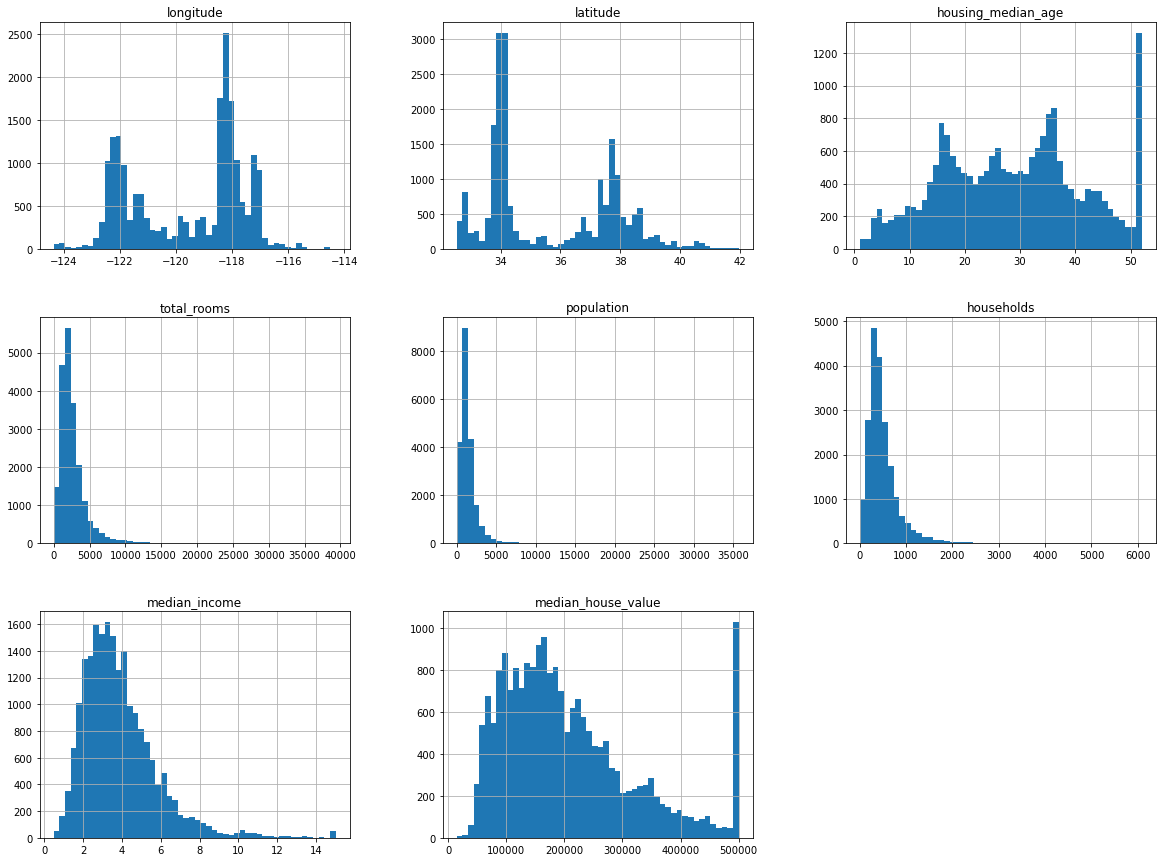

<Figure size 4320x2880 with 0 Axes>

In [17]:
dataset.hist(bins=50, figsize=(20,15))
plt.figure(figsize=(60,40))

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  object 
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 1.7+ MB


In [19]:
dataset.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


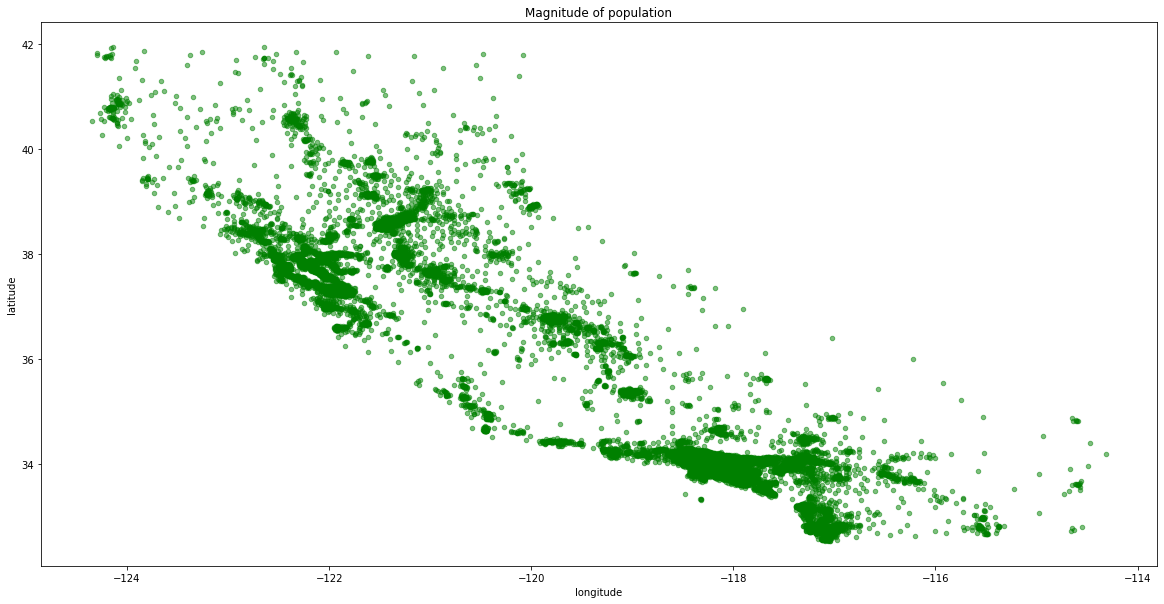

In [20]:
dataset.plot(x='longitude', y= 'latitude', kind='scatter', color='green',alpha=0.5,figsize=(20,10))
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Magnitude of population")
plt.show()

shows the population distribution across latitude and longitude

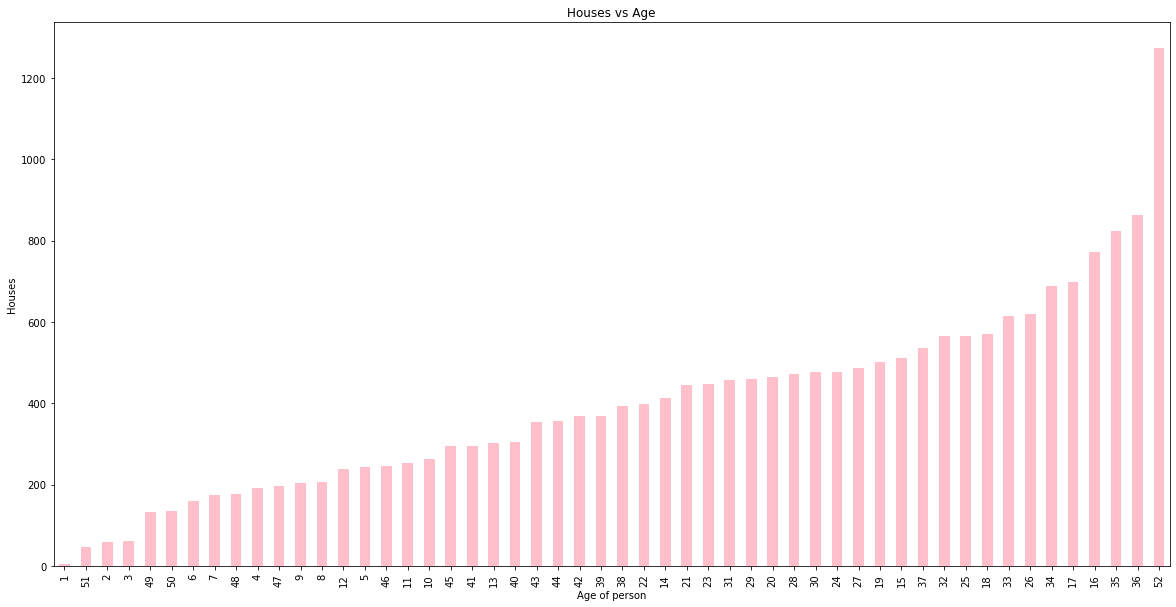

In [21]:
med_age = dataset['housing_median_age'].value_counts().sort_values(ascending= True)
plt.figure(figsize=(20,10))
med_age.plot.bar(color='pink')
plt.xlabel("Age of person")
plt.ylabel("Houses")
plt.title("Houses vs Age")
plt.show()

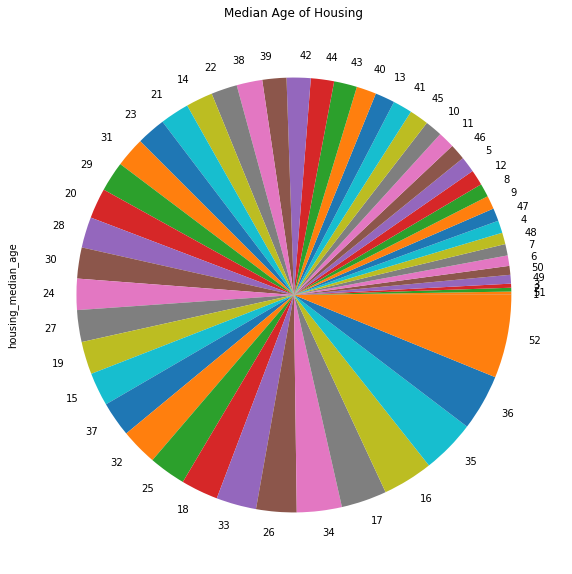

In [22]:
med_age = dataset['housing_median_age'].value_counts().sort_values(ascending= True)
plt.figure(figsize=(20,10))
med_age.plot.pie()
plt.title("Median Age of Housing")
plt.show()

52 year olds own the maximum number of houses

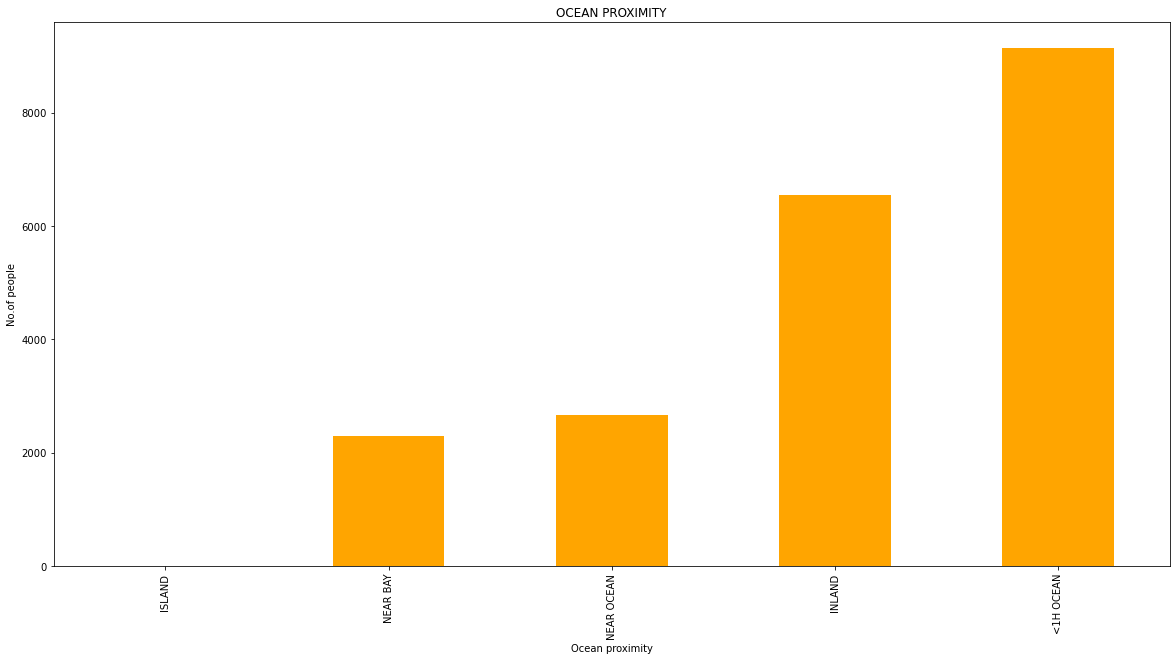

In [23]:
region = dataset['ocean_proximity'].value_counts().sort_values(ascending= True)
plt.figure(figsize=(20,10))
region.plot.bar(color='orange')
plt.xlabel("Ocean proximity")
plt.ylabel("No.of people")
plt.title("OCEAN PROXIMITY")
plt.show()

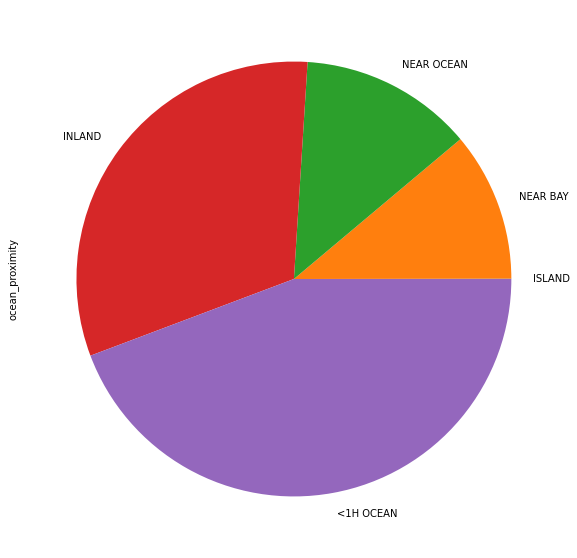

In [24]:
region = dataset['ocean_proximity'].value_counts().sort_values(ascending= True)
plt.figure(figsize=(20,10))
region.plot.pie()
plt.show()

<1H proximity from the ocean is most prffered among the people

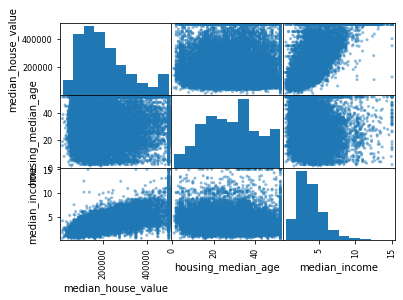

<Figure size 1440x720 with 0 Axes>

In [25]:
from pandas.plotting import scatter_matrix 
features = ['median_house_value', 'housing_median_age', 
            'median_income'] 
scatter_matrix(dataset[features]) 
plt.figure(figsize=(20,10))
plt.show() 

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

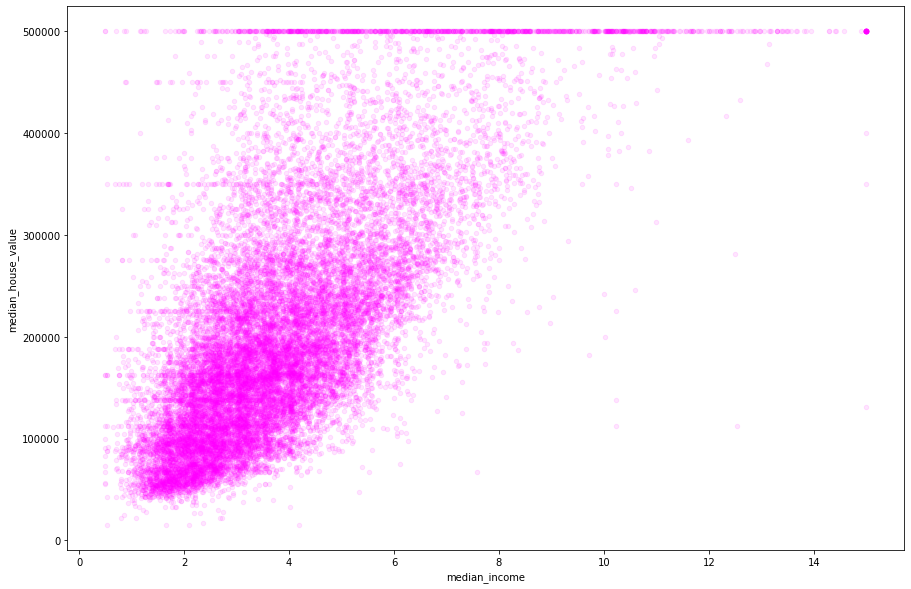

In [26]:
dataset.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, color='magenta', figsize=(15,10))

shows the relationship between median house value and the median income of the people

<AxesSubplot:xlabel='ocean_proximity', ylabel='population'>

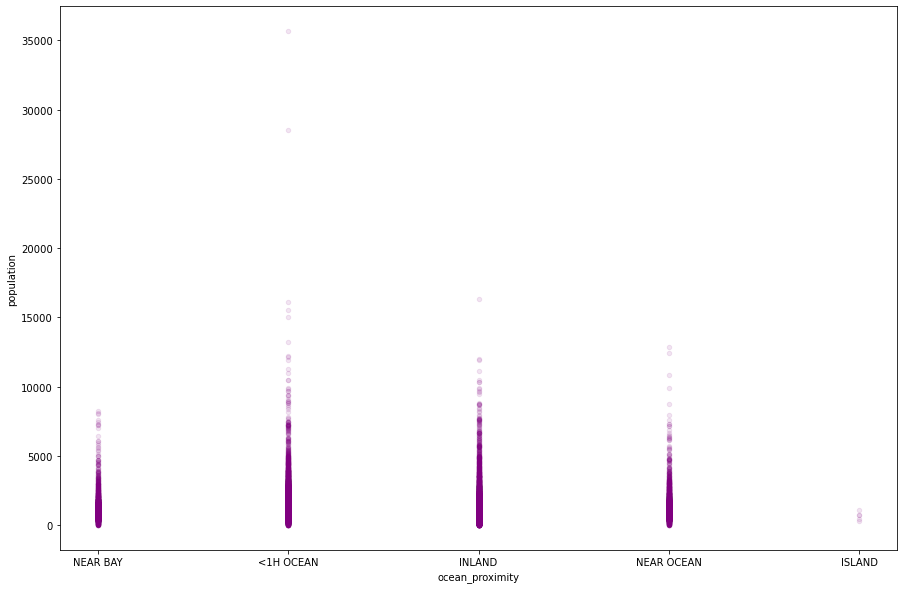

In [27]:
dataset.plot(kind="scatter", x="ocean_proximity", y="population", alpha=0.1, color='purple',figsize=(15,10))

<1H proximity is most preffered and Island is least preferred

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

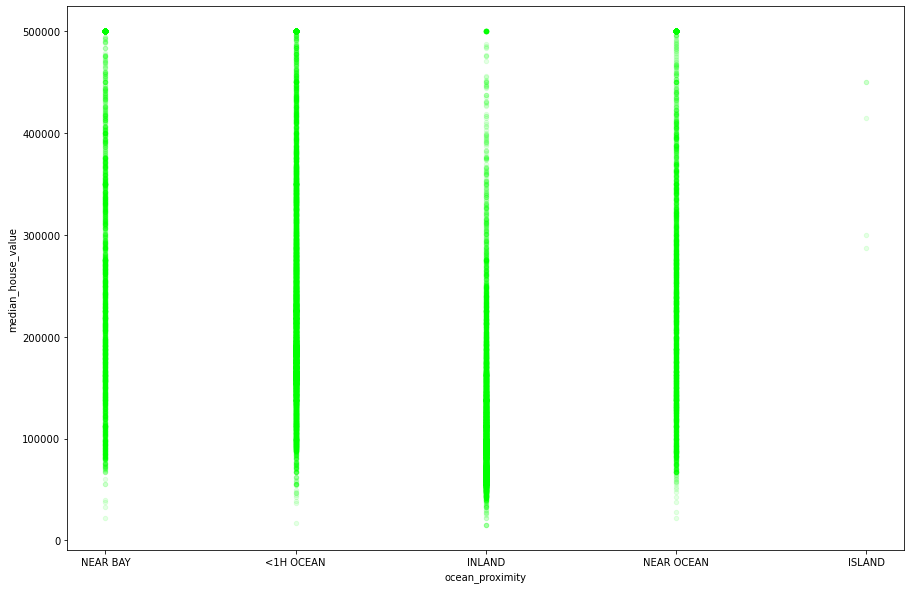

In [28]:
dataset.plot(kind="scatter", x="ocean_proximity", y="median_house_value", alpha=0.1, color='lime',figsize=(15,10))

# Multiple Linear Regression

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
dataset = pd.read_csv('housing.csv',encoding='latin-1')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [31]:
print(X)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income ocean_

In [32]:
print(y)

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64


In [33]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [34]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [35]:
print(dataset["total_bedrooms"].describe())

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


In [36]:
total_bedrooms = dataset[dataset["total_bedrooms"].notnull()]["total_bedrooms"]

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(np.nan,strategy ="mean")
imputer.fit(X.iloc[:,4:5])
X.iloc[:,4:5] = imputer.transform(X.iloc[:,4:5])
X.isnull().sum()

C:\Users\priya\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass missing_values=nan as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [38]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [39]:
print(X)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income ocean_

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [41]:
X

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.2200e+02, 1.2600e+02,
        8.3252e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.4010e+03, 1.1380e+03,
        8.3014e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 4.9600e+02, 1.7700e+02,
        7.2574e+00],
       ...,
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0070e+03, 4.3300e+02,
        1.7000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 7.4100e+02, 3.4900e+02,
        1.8672e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.3870e+03, 5.3000e+02,
        2.3886e+00]])

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

###### Split into Train and test sets, test set containing 20% data

In [43]:
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (16512, 13) and size 214656
X_test shape (4128, 13) and size 53664
y_train shape (16512,) and size 16512
y_test shape (4128,) and size 4128


In [44]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [45]:
dataset.replace([np.inf,-np.inf],np.nan,inplace=True)

In [46]:
dataset.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


# FEATURE ENGINEERING

In [47]:
dataset['rooms_per_household'] = dataset['total_rooms'] / dataset['households']
dataset['bedrooms_per_room'] = dataset['total_bedrooms'] / dataset['total_rooms']
dataset['population_per_household'] = dataset['population'] / dataset['households']


In [48]:
dataset=dataset[['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household',
 'median_house_value']]

###### Adding new elements

## NEW DATA SET

In [49]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,6.984127,0.146591,2.555556,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,6.238137,0.155797,2.109842,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,8.288136,0.129516,2.802260,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,5.817352,0.184458,2.547945,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,6.281853,0.172096,2.181467,342200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,5.045455,0.224625,2.560606,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,6.114035,0.215208,3.122807,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,5.205543,0.215173,2.325635,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,5.329513,0.219892,2.123209,84700


### LINEAR REGRESSION MODEL

In [50]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:
regressor.predict(X_test)

array([216580.43445117, 287452.10783576, 179457.58064555, ...,
        89138.63966554, 255304.51129848, 213286.39732916])

In [52]:
score = regressor.score(X_train,y_train)
print(score)

0.6471730344800684


In [53]:
score = regressor.score(X_test,y_test)
print(score)

0.6381617983930448


###### scrore of test and train set are almost equal having negligible diffrence of 0.009011236087023589

In [54]:
y_pred = regressor.predict(X_test)

In [55]:
y_pred

array([216580.43445117, 287452.10783576, 179457.58064555, ...,
        89138.63966554, 255304.51129848, 213286.39732916])

In [56]:
print(len(y_pred))
print(len(y_test))
print(y_pred[0:50])
print(y_test[0:50])

4128
4128
[216580.43445117 287452.10783576 179457.58064555  86485.4183397
 291756.93744856 202748.28191067 281874.99804605 315209.96554559
 307307.07930597 241904.0467077  238139.16988962  98517.57441791
  77841.1397821  166763.82626446 194483.35545937 277939.80722809
 353238.15801808 191614.81187881 209037.74534338 279923.12519255
 168631.68051787  76460.68302817 267434.74277485 251952.76176138
 179375.7641687  173753.00183473 215938.31803196 219119.95194969
 174195.35892993  92319.64119788 351582.57333725 289391.13728339
 268201.02146488 207828.33044376  68147.91204677 187399.7039128
 156795.6548656  131922.39020627 297645.73397568 207857.12831022
 200843.48294291  97195.41384082 114788.5903811  219441.94131678
 204065.51631067  45937.75365322 168646.58653308 194203.51763151
 235467.13966332 218926.53955205]
14740    136900
10101    241300
20566    200700
2670      72500
15709    460000
439      120000
845      247000
3768     336900
964      339700
8681     265600
17935    237900
92

###### y_pred represents the predicted values and y_test represents the original values

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6381617983930448

## Conclusion: Model accuracy = 63.81%